# Robust PCA Implementation
In this assignment question, we want to assess your ability to implement an optimization algorithm from a given paper. 

The task is to implement:
Algorithm 1 (Principal Component Pursuit by Alternating Directions) described on page 29 in

https://arxiv.org/abs/0912.3599

Although the paper is filled with complex proofs, the concept is straight forward and the algorithm can be implemented with a reasonable amount of code.

## Background
Electricity prices tend to vary smoothly in response to supply and demand signals, but are subject to intermittent price spikes that deviate substantially from normal behaviour.

Forming the price data from one commerical trading hub into a matrix $M$ with each day as a row and each hour as a column, we can consider $M$ as the combination of a low-rank matrix $L$ consisting of the normal daily market behaviour, and a sparse matrix $S$ consisting of the intermittent price spikes.

$M$ = $L + S$

Since we can only measure the market prices $M$, we wish estimate $L$ and $S$ by solving the Robust PCA problem:

$\min{\|L\|_* + \lambda |S|_1}$

subject to $L + S = M$ 

## Dataset

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from RobustPCA.rpca import RobustPCA  # install RobustPCA according to Readme.md
from RobustPCA.spcp import StablePCP

(244, 24)


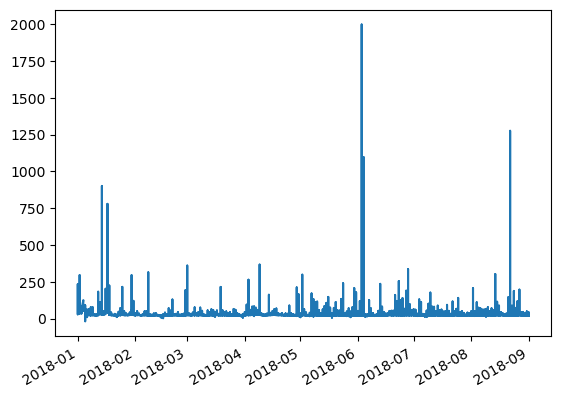

In [4]:
data = pd.read_csv("Question1.csv", index_col=0, parse_dates=True)

# Unroll the daily values to plot the timeseries. Note the spikes we wish to separate.
timeseries = data.stack()
timeseries.index = timeseries.index.droplevel(1)
timeseries.plot()

M = data.values
print(M.shape)

The matrix $M$ is 244 rows (days) by 24 columns (hours).

## Implementation

Solve for $L$ and $S$, the low-rank component and sparse component of the matrix $M$.

In [6]:
# construct 2D matrix for feeding rpca
#M = data.Sale.values.reshape(11,12)

# Robust PCA
rpca = RobustPCA(max_iter=10000)

rpca.fit(M)
L = rpca.get_low_rank()
S = rpca.get_sparse()

Converged!


In [22]:
print(L.shape)
print(S.shape)

(244, 24)
(244, 24)


In [21]:
M_prime = L.T @ S
M_prime.shape

(24, 24)

In [ ]:
# M = data.values
# print(M.shape)

# # %%
# R_0 = np.linalg.matrix_rank(M)

# # Compute the SVD
# U, D, V = np.linalg.svd(M, full_matrices=False)

# # Confirm U D V = M
# np.allclose(U @ np.diag(D) @ V, M)

# # %%
# import matplotlib.pyplot as plt

# DEFAULT_FIGSIZE = (8, 5)

# plt.figure(figsize=DEFAULT_FIGSIZE)

# plt.plot(np.arange(1, len(D) + 1), D, "o")
# plt.xticks(np.arange(1, len(D) + 1))
# plt.yscale("log")
# plt.title("Plot of singular values")



## Results

Text(0.5, 1.0, 'Normal daily market L and intermittent price spikes S')

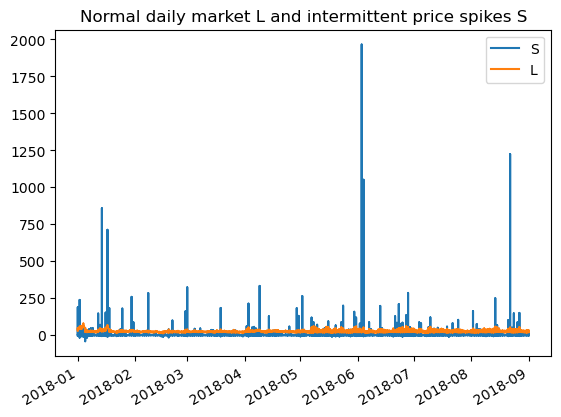

In [33]:
#normal daily market behaviour, and a sparse matrix $S$ consisting of the intermittent price spikes
df= pd.DataFrame({'S':S.flatten(), 'L':L.flatten()}, index=timeseries.index)
df.plot()
plt.title("Normal daily market L and intermittent price spikes S")

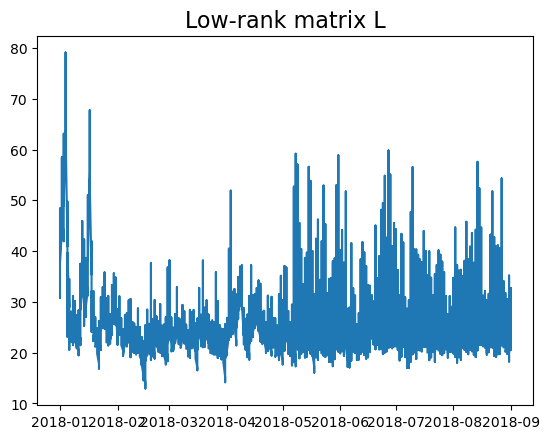

In [36]:
plt.plot(timeseries.index, L.flatten())
plt.title("Low-rank matrix L", fontsize=16)

In [ ]:
# removed outliers
plt.plot(timeseries.index, S.flatten())
plt.title("Sparse matrix S", fontsize=16)